## Example: Ridge regression, LASSO, elasticnet

We create synthetic test data:

In [1]:
import numpy as np
from wotan import flatten

points = 1000
time = np.linspace(0, 30, points)
flux = 1 + ((np.sin(time) + time / 10 + time**1.5 / 100) / 1000)
noise = np.random.normal(0, 0.0001, points)
flux += noise
for i in range(points):
    if i % 75 == 0:
        flux[i:i+5] -= 0.0004  # Add some transits
        flux[i+50:i+52] += 0.0002  # and flares
flux[300:400] = np.nan  # and a gap

Run wotan:

In [6]:
flatten_lc1, trend_lc1 = flatten(
    time,                 # Array of time values
    flux,                 # Array of flux values
    method='ridge',
    window_length=0.5,    # The length of the filter window in units of ``time``
    break_tolerance=0.5,  # Split into segments at breaks longer than that
    return_trend=True,    # Return trend and flattened light curve
    )

flatten_lc2, trend_lc2 = flatten(
    time,                 # Array of time values
    flux,                 # Array of flux values
    method='lasso',
    window_length=0.5,    # The length of the filter window in units of ``time``
    break_tolerance=0.5,  # Split into segments at breaks longer than that
    return_trend=True,    # Return trend and flattened light curve
    )

flatten_lc3, trend_lc3 = flatten(
    time,                 # Array of time values
    flux,                 # Array of flux values
    method='elasticnet',
    window_length=0.5,    # The length of the filter window in units of ``time``
    break_tolerance=0.5,  # Split into segments at breaks longer than that
    return_trend=True,    # Return trend and flattened light curve
    )

Visualize the result. All 3 methods produce very similar results for this dataset:

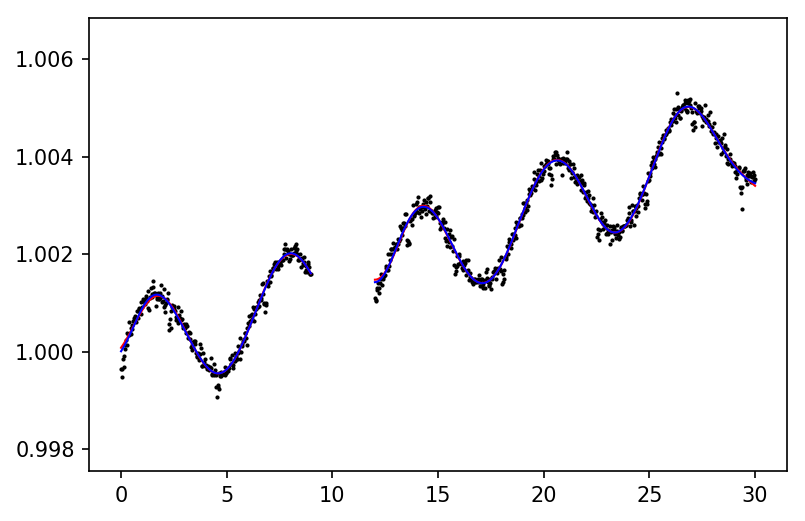

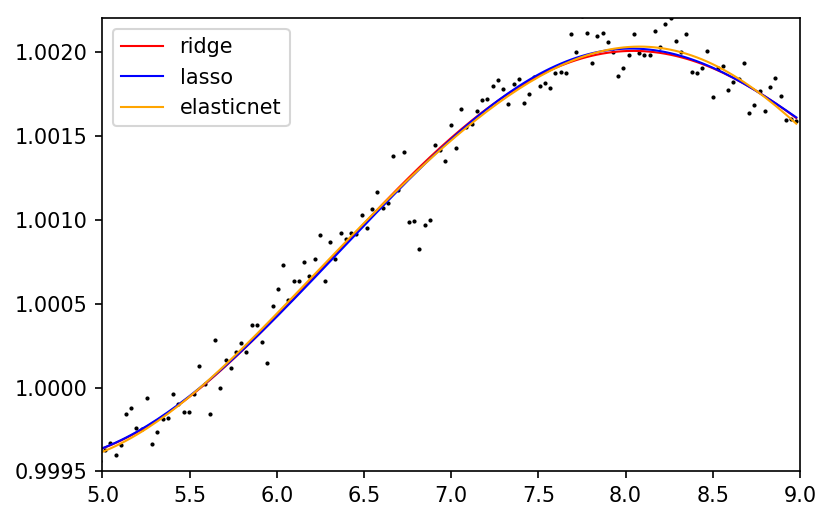

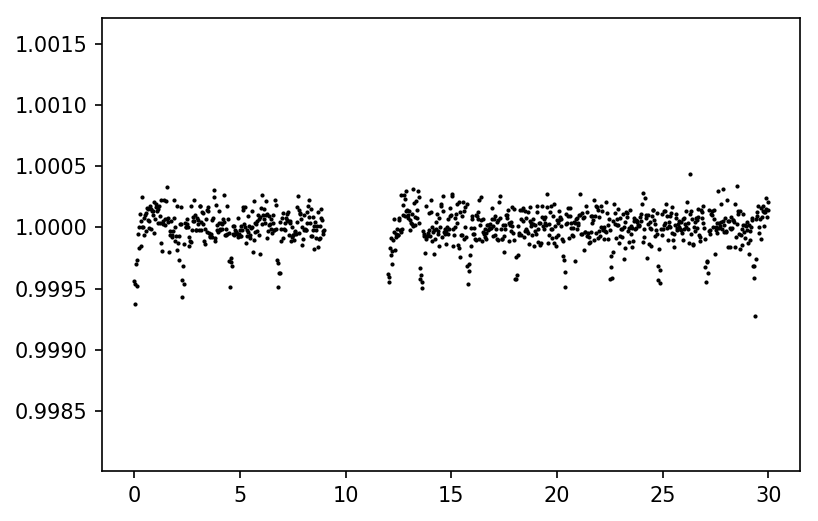

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rcParams; rcParams["figure.dpi"] = 150

plt.scatter(time, flux, s=1, color='black')
plt.plot(time, trend_lc1, color='red', linewidth=1)
plt.plot(time, trend_lc2, color='blue', linewidth=1)
plt.show();
plt.close()

plt.scatter(time, flux, s=1, color='black')
plt.plot(time, trend_lc1, color='red', linewidth=1, label='ridge')
plt.plot(time, trend_lc2, color='blue', linewidth=1, label='lasso')
plt.plot(time, trend_lc3, color='orange', linewidth=1, label='elasticnet')
plt.xlim(5, 9)
plt.ylim(0.9995, 1.0022)
plt.legend()
plt.show();
plt.close()

plt.scatter(time, flatten_lc1, s=1, color='black');